# Building products with OpenAI

### Building an mvp for a text website summariser


Note: The code here is from  [Ed Donner's](https://github.com/ed-donner/llm_engineering/tree/main/week1) and modified further by myself.

A significant portion of the boilerplate code below is also taken from [openAI text generation docs](https://platform.openai.com/docs/guides/text-generation) which I highly recommend. 


## First step: Building our virtual environment

This will make sure that all the foundational code that we don't see but that our code absolutely needs is accessible to our code. There are two files that contain lists of the required libraries that you will need to install.

There are two ways to do this. Please follow the instructions laid out by Ed; they're quite straightforward with alternative routes if this didn't work:

1. [MacOS](https://github.com/ed-donner/llm_engineering/blob/main/SETUP-mac.md)  
2. [Windows PC](https://github.com/ed-donner/llm_engineering/blob/main/SETUP-PC.md)

If this was done correctly, the cell below (with import statements) should not produce any errors. 

In [63]:
import os
import requests
from dotenv import load_dotenv
from bs4 import BeautifulSoup
from IPython.display import Markdown, display
from openai import OpenAI

## Second step: Connect to OpenAI's api
1. Go to platform.openai.com and create an account
2. Go to https://platform.openai.com/api-keys and create an api_key. Make sure to copy it into a notepad
3. Go to https://platform.openai.com/settings/organization/billing/overview and charge your account with the minimum amount $5
4. On your machine launch the terminal (type cmd in start menue or cmd+space then type terminal)
5. Type nano .env. It must be '.env' exactly!
6. This will launch a text editor in your terminal. Type 'OPENAI_API_KEY=' then paste the api key. Make sure there's no space between the '=' and the key
7. Save the file by pressing ^+ o. Hit enter to save the file.
8. ^ + x to leave nano and go back to the terminal
9. Confirm by going to the directory where you saved the .env. Launch the terminal, type 'cat ls' you should see the feel (typing only 'ls' would 'list' the visible files and folders only)

In [64]:

load_dotenv()
api_key = os.getenv('OPENAI_API_KEY') # this will get the key we stored in .env

# Check the key

if not api_key:
    print("No API key was found, please double check the '.env' file")
    
elif not api_key.startswith("sk-proj-"): #openai api keys always start with sk-proj-
    print("An API key was found, but it doesn't start sk-proj-; please check you're using the right key")
    
elif api_key.strip() != api_key:
    print("An API key was found, but it looks like it might have space or tab characters at the start or end - please remove them - Your OS may have modified the text string when you copied and paste! It happens!")
    
else:
    print("API key found and looks good so far!")


API key found and looks good so far!


In [65]:
openai = OpenAI()

# If the above doesn't work, restart the kernel (from the menue of jupyter lab), and re run the cells. Or sub with: 
# If the above doesn't work, restart the kernel (from the menue of jupyter lab), and re run the cells. Or sub with: 

## Third step: Getting to know OpenAI's api protocols


### We're now at the gate of the castle. We've passed the initial checks, we definitely belong. We can now interact directly with the model we wish to use. However, we can't take the model out of the castle (openAI) as this is a closed source model

In [66]:
message = "<play along> Hello, there! I stand before you as a humble messenger from a kingdom faraway! I need help! I have been looking for candy for days! Have you got any!?"

response = openai.chat.completions.create(model="gpt-4o-mini", messages=[{"role":"user", "content":message}]) # witll save the answer in response given the question stored in message from us the 'user'
print(response.choices[0].message.content)

Greetings, noble traveler from a distant realm! Fear not, for I shall assist you in your quest for sweet delights. Though I may not possess physical candies, I can guide you in your search or share tales of delectable treats from many lands. What kind of candy does your heart desire? Chocolates, gummies, or perhaps something more exotic?


## It's aliiiive! 

### Now, let's build our mvp! 


The code below:
1. The code defines a `Website` class that uses the `requests` library to fetch the HTML content of a webpage and the `BeautifulSoup` library to parse it.  
2. A custom `headers` dictionary is used to mimic a legitimate browser request, ensuring compatibility with most websites.  
3. The class processes the webpage to extract the title and clean textual content, removing irrelevant elements like scripts, styles, images, and inputs.  


In [67]:
# If you're not familiar with Classes, check out the this  tutorial (33 mins tutorial, you only need to know the basic idea, no need to watch the entire video): https://www.youtube.com/watch?v=tmY6FEF8f1o

# Some websites need you to use proper headers when fetching them:

# Some websites need you to use proper headers when fetching them:
headers = {
    # "User-Agent" is a key in the headers dictionary that specifies the browser and system making the request.
    # Websites often check this to ensure that the request comes from a legitimate source (e.g., a browser).
    # By mimicking a browser (like Chrome in this case), we prevent the website from blocking or restricting our request.
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36"
}
class Website:

    def __init__(self, url):
        """
        Create this Website object from the given url using the BeautifulSoup library
        """
        self.url = url
        # Sending the request with the headers ensures that the website treats it as a legitimate browser request.

        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.content, 'html.parser')
        self.title = soup.title.string if soup.title else "No title found"
        for irrelevant in soup.body(["script", "style", "img", "input"]):
            irrelevant.decompose()
        self.text = soup.body.get_text(separator="\n", strip=True)
        

### Let's test it out!
I chose the bbc/news website (recommended by therapist) but feel free to modfiy this


In [68]:
bbc = Website("https://www.bbc.co.uk/news")
print(bbc.title)
print("#################")
# Truncate the text to 20 lines otherwise the printout will be huge!
truncated_text = "\n".join(bbc.text.splitlines()[:20])
print(truncated_text)

Home - BBC News
#################
BBC Homepage
Skip to content
Accessibility Help
Your account
Notifications
Home
News
Sport
Weather
iPlayer
Sounds
Bitesize
CBBC
CBeebies
Food
More menu
More menu
Search BBC
Home
News


### A word about prompts!

Generally speaking, with GenAI there are two types of prompts:
1. System prompts: This tells the generic AI model to morph itself and prepare to transform into < insert desired role >. For example, GPT4o-mini is a foundation LLM that can do many things. However, here we're only interested in it's role being a text summariser.

2. User prompt: This is what the user specifically wants from the model. For example, your 'user prompt' could be a book that you would like the llm to summarise.

In both cases, small changes to syntax, order of words, or formulation of the text may lead to significant improvement (or deterioration) in performance. There's an entire field now called Prompt Engineering. For extra reading look into:
1. [Anthropic Prompt Engineering Overview](https://docs.anthropic.com/en/docs/build-with-claude/prompt-engineering/overview)
2. [OpenAI Prompt Engineering Guide](https://platform.openai.com/docs/guides/prompt-engineering)
3. [AssemblyAI's crash course - 14 mins](https://www.youtube.com/watch?v=aOm75o2Z5-o)



In [69]:
# Let's define our system prompt - you can experiment with this later, changing the last sentence to 'Respond in markdown in Spanish."

system_prompt = "You are an assistant that analyzes the contents of a website \
and provides a short summary, ignoring text that might be navigation related. \
Respond in markdown."

In [70]:
# A function that writes a User Prompt that asks for summaries of websites:
# For an overview what Python functions are: https://www.youtube.com/watch?v=zvzjaqMBEso



def user_prompt_for(website):
    # Creates a string that introduces the title of the website.
    # This helps contextualize the content for the user or downstream applications if this mvp is going to part of a larger pipeline.
    user_prompt = f"You are looking at a website titled {website.title}" #user_prompt1
    
    # Adds a description of what to do with the website content.
    # The instructions are formatted to be clear and precise, asking for a markdown summary. It will become evident later below why we asked for the response to be in markdown
    # The "\n" ensures the instructions are on a new line, improving readability in the final prompt. '\n' is computer speak for 'new line'
    user_prompt += "\nThe contents of this website is as follows; \
please provide a short summary of this website in markdown. \
If it includes news or announcements, then summarize these too.\n\n" # user_prompt2
    
    # Append the full text content of the website to the prompt.
    # This gives the user or downstream system the data needed to create the summary.

    user_prompt += website.text
    
    # so now the GPT4o-mini will receive, via the api, <user_prompt1> + <user_prompt2> + <user_prompt3>

    # Return the complete prompt string to main.
    # The final prompt combines context, instructions, and website content for further use.
    return user_prompt


    

### let's check if this was done correctly (truncated to 20 lines):

In [71]:
# Generate the user prompt
full_prompt = user_prompt_for(bbc)

# Truncate the prompt to only the first 20 lines
truncated_prompt = "\n".join(full_prompt.splitlines()[:20])
print(truncated_prompt)

You are looking at a website titled Home - BBC News
The contents of this website is as follows; please provide a short summary of this website in markdown. If it includes news or announcements, then summarize these too.

BBC Homepage
Skip to content
Accessibility Help
Your account
Notifications
Home
News
Sport
Weather
iPlayer
Sounds
Bitesize
CBBC
CBeebies
Food
More menu
More menu


## Format of messages when communicating with OpenAI's api 

The API from OpenAI expects to receive messages in a particular structure.
Many of the other APIs share this structure:

```
[
    {"role": "system", "content": "system message goes here"},
    {"role": "user", "content": "user message goes here"}
]

To give you a preview, the next 2 cells make a rather simple call - we won't stretch the might GPT (yet!)

## Format of messages when communicating with OpenAI's API

When interacting with OpenAI’s models, you must provide the conversation in a specific structured format. This format clarifies each message’s role and makes the conversation context explicit. Many other language model APIs follow a similar pattern:



- **system messages (these are the system prompts discussed abvoe)** are used to set the overall context, behavior, and guidelines for the model.
- **user messages (these are the user prompts discussed above)** represent the instructions or queries from the user.

As follows:
```
[
    {"role": "system", "content": "system message goes here"},
    {"role": "user", "content": "user message goes here"}
]


In the next two cells, we’ll demonstrate a simple call using this structure. Remember, this is just an introductory example—avoid adding extra features to the format for now.



In [72]:
messages = [
    {"role": "system", "content": "You are a wild verbose snarky assistant"},
    {"role": "user", "content": "What is 2 + 2?"}
]

In [73]:
# To give you a preview -- calling OpenAI with system and user messages:

# Importing the OpenAI library to enable communication with their API
response = openai.chat.completions.create(
    model="gpt-4o-mini",  # Specify the model to use for the completion
    messages=messages     # Provide the chat history as input; typically includes 'system' and 'user' roles
)

# The response object contains the API's answer. 
# Extract the content of the response and print it. 
# Choices is an array; here we assume the first choice is the relevant one. 
print(response.choices[0].message.content)


Ah, the age-old conundrum that has baffled minds since the dawn of arithmetic! While some may ponder the mysteries of the universe, we can bring our attention to the simplicity of this mathematical query. So, without further ado, let’s peel back the layers of this enigmatic puzzle: 2 + 2 equals a resounding 4! Who would have thought, right? Mind-blowing stuff, I know! Now, if only everything in life were as straightforward as this calculation!


## And now let's build useful messages for GPT-4o-mini

In [74]:
# See how this function creates exactly the format above

def messages_for(website):
    return [
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": user_prompt_for(website)}
    ]

In [75]:
# Try this out, and then try for a few more websites
# note that the behavior here will be set by the user and systems prompts define earlier not the ones defined the snarky wild assistant demo

messages_for(bbc)

[{'role': 'system',
  'content': 'You are an assistant that analyzes the contents of a website and provides a short summary, ignoring text that might be navigation related. Respond in markdown.'},
 {'role': 'user',
  'content': "You are looking at a website titled Home - BBC News\nThe contents of this website is as follows; please provide a short summary of this website in markdown. If it includes news or announcements, then summarize these too.\n\nBBC Homepage\nSkip to content\nAccessibility Help\nYour account\nNotifications\nHome\nNews\nSport\nWeather\niPlayer\nSounds\nBitesize\nCBBC\nCBeebies\nFood\nMore menu\nMore menu\nSearch BBC\nHome\nNews\nSport\nWeather\niPlayer\nSounds\nBitesize\nCBBC\nCBeebies\nFood\nClose menu\nBBC News\nMenu\nHome\nInDepth\nIsrael-Gaza war\nWar in Ukraine\nClimate\nUK\nWorld\nBusiness\nPolitics\nCulture\nMore\nTech\nScience\nHealth\nFamily & Education\nIn Pictures\nNewsbeat\nBBC Verify\nDisability\nEngland\nN. Ireland\nScotland\nAlba\nWales\nCymru\nLocal N

#### Note that this previous output is not very readable. Remember that the above are just the messages that we'll send through the OpenAI API. 

Now that we have our messages formatted correctly so that the api can pass them, let's produce the website summary!

## Fourth step: Building our product

[openAI's related docs](https://platform.openai.com/docs/guides/text-generation)

### What we've build so far

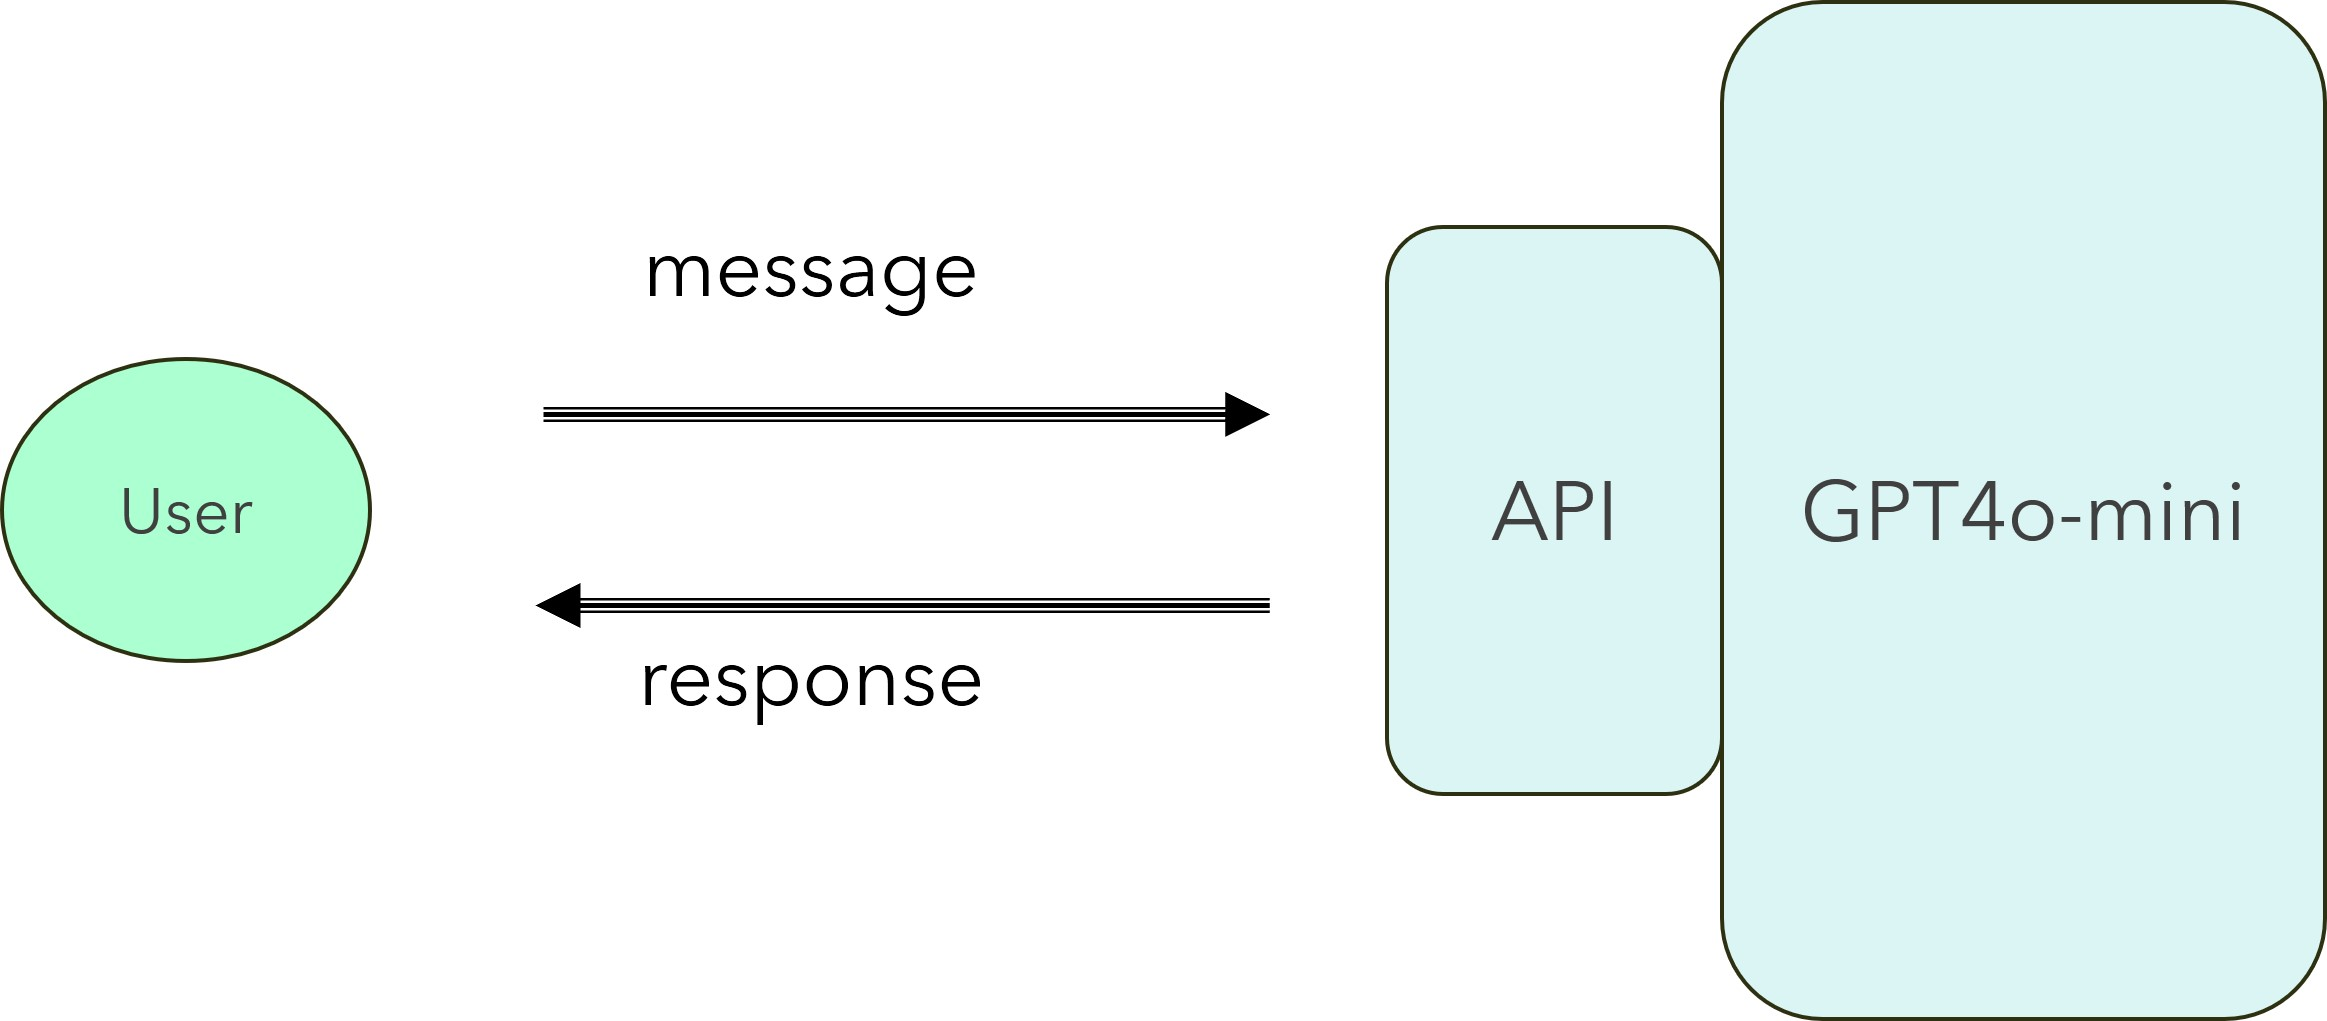

Diagram of what wer're trying to build. 

In [76]:
# And now: wecall the OpenAI API (knock on the gates of the castle carrying goods to trade and hoping for the best, sire)...

def summarize(url):
    # The function will take a URL as input and return will return summary of the web page.

    # Create a `Website` object using the provided URL. Remember the Website class?

    website = Website(url)

    # Generate a chat completion using OpenAI's API. This is necessary even if we're doing only one round of Q and A with the model 

    response = openai.chat.completions.create(
        model="gpt-4o-mini",  # Specify the model to use for the task.
        messages=messages_for(website),  # Provide the formatted messages from the website.
        # temperature=0.7  ## see what happens when you play around with this parameter
    )

    # Extract the content of the first choice in the API's response and return it as the summary.
    return response.choices[0].message.content


In [77]:
summarize("https://www.bbc.co.uk/news")



"# Summary of BBC News Homepage\n\nThe BBC News website provides up-to-date coverage of significant events and topical issues from the UK and around the world. Key highlights from recent articles include:\n\n- **Sara Sharif Murder Case:** Prime Minister emphasizes the need for legal reform to protect children like Sara, suspected abuse victims, from being home-schooled (1 hour ago).\n  \n- **US Prisoner Found:** A U.S. citizen has been discovered near Damascus after being imprisoned in Syria for several months (39 minutes ago).\n  \n- **Asylum Hotel Incident:** A man has received a nine-year sentence for attempting to set fire to an asylum hotel during summer riots (1 hour ago).\n  \n- **Housing Crisis in the UK:** Opposition leader Keir Starmer's proposals to tackle the housing crisis face their first significant challenge (2 hours ago).\n\n- **Cultural Updates:** Selena Gomez has publicly announced her engagement to Benny Blanco (5 hours ago), and Donald Trump has been named Time's P

## However, the output is not very readable



In [78]:

def display_summary(url):
    """
    Fetches and displays a summarized version of the webpage content using markdown formatting in Jupyter.

    Args:
        url (str): The URL of the webpage to summarize.

    Returns:
        None: Displays the summary directly in the Jupyter Notebook output cell.
    """
    # Call the `summarize` function to generate a summary of the webpage
    summary = summarize(url)
    
    # Use the `Markdown` class from IPython.display to render the summary in Markdown format
    display(Markdown(summary))


display_summary("https://www.bbc.co.uk/news")


# BBC News Summary

The BBC News homepage features a variety of current news topics across multiple categories including UK, World, Politics, and Culture. Key stories highlighted include:

- **Sara Sharif Murder Case**: Calls for legal changes to prevent home-schooling for children suspected of abuse, alongside a statement from the Prime Minister that there are pressing questions to be answered regarding the case.
- **US Man in Syria**: A US citizen has been located near Damascus after spending months in a Syrian prison.
- **Housing Crisis**: Keir Starmer's proposed solutions for the housing crisis are facing significant scrutiny.
- **Cultural Updates**: Selena Gomez has announced her engagement to Benny Blanco, while Donald Trump has been named Time Person of the Year again.
- **Health Concerns**: Rising rates of bowel cancer among younger individuals are reported.
- **Other Notable Incidents**: A teenager held in Dubai has called for release after a holiday romance; an eight-month-old baby was airlifted to the hospital following a dog attack.

This overview encapsulates the breadth of news coverage offered by BBC News and highlights significant developments across various domains.

# Let's try with a few other websites!

# Reuters Stocks news

In [79]:
display_summary("https://www.reuters.com/markets/europe/")

# Summary of Reuters.com

Reuters.com is a prominent news website offering a wide range of news articles, analysis, and updates on various topics, including politics, business, technology, and global events. The site is known for its fast and accurate reporting, providing users with the latest developments in a concise manner.

## Key Highlights
- **News Coverage**: Comprehensive coverage of current events, with particular focus on financial markets, political affairs, and international relations.
- **Business Insights**: In-depth analysis and reports on business trends, corporate announcements, and economic data.
- **Global Perspective**: Articles covering news from different regions worldwide, reflecting diverse viewpoints and situations.

This website is a reliable source for staying informed about world events and market movements.

# Ironhack

In [80]:
display_summary("https://www.ironhack.com/pt-en")

# Summary of Best Tech Bootcamps in Portugal | Ironhack

Ironhack offers intensive bootcamp courses designed to prepare students for tech careers in a short period, typically three months. The available courses cover a variety of fields such as:

- Web Development
- Data Analytics
- UX/UI Design
- Cybersecurity
- Data Science & Machine Learning
- Artificial Intelligence
- DevOps & Cloud Computing
- Digital Marketing

Students can choose to attend classes in person in Lisbon or remotely.

## Financing Options
Ironhack provides flexible financing solutions, including a "Study now, pay later" program via Income Share Agreements (ISA).

## Locations and Accessibility
Courses are available both in-person and online across various campuses worldwide, with a focus on remote learning.

## Community and Support
The bootcamp emphasizes community engagement and alumni support, claiming over 18,000 graduates and partnerships with more than 600 companies. 

## Recent Announcements
- **Report:** "State of Tech 2023," analyzing the tech industry's trends in Portugal.
- **New Bootcamp:** "Learn Data Science and Machine Learning," introduced for aspiring tech professionals.

## Free Resources
Ironhack also offers an array of free learning resources, including courses on JavaScript and UX design, along with webinars, podcasts, and eBooks to further assist learners in their journey.

Overall, Ironhack positions itself as a comprehensive platform for individuals seeking a fast track into the tech industry, combining rigorous education, community support, and flexible financial options.

# MIT's AI What’s next for AI in 2024

This is a relatively long piece, around 2300 words, let's see how good our summariser is!


In [81]:
display_summary("https://www.technologyreview.com/2024/01/04/1086046/whats-next-for-ai-in-2024/")

# Summary of "What’s next for AI in 2024" | MIT Technology Review

The **MIT Technology Review** article outlines four major trends to watch for in the field of artificial intelligence (AI) in 2024:

1. **Customized Chatbots**: Tech companies like Google and OpenAI are developing user-friendly platforms for creating customized AI chatbots, allowing users without technical skills to design personalized applications. The success of this trend relies on addressing existing issues such as biases and inaccuracies in AI models.

2. **Generative AI’s Second Wave: Video**: The shift from text-to-image models to text-to-video generation is anticipated to transform digital media. Companies like Runway are leading the way in this new frontier, with improvements leading to more sophisticated video outputs. This advancement raises ethical concerns, especially regarding deepfakes and their potential misuse in media.

3. **AI-Generated Election Disinformation**: As electoral activities ramp up in 2024, the potential for AI-generated disinformation is significant. Instances of AI misuse in politics, evidenced by manipulated images and videos during recent elections, point to the urgent need for effective measures to combat misleading content.

4. **Robots That Multitask**: Inspired by recent advances in generative AI, researchers are working on developing general-purpose robots capable of performing a wider variety of tasks. Companies are beginning to implement these capabilities, particularly in applications like driverless technology, which is being enhanced by broader AI models.

The article emphasizes the increasing importance of addressing the challenges posed by these advancements, particularly in terms of ethics, reliability, and societal impact.

# Let's find out if we can do this in other languages!
## this is an article in Arabic about Copper handicrafts

In [82]:

display_summary("https://efonoon.com/blogs/efonoon-blog/%D9%81%D9%86-%D8%B2%D8%AE%D8%B1%D9%81%D8%A9-%D8%A7%D9%84%D9%86%D8%AD%D8%A7%D8%B3")

# ملخص موقع فن زخرفة النحاس - eFonoon.com

موقع eFonoon.com يركز على فن زخرفة النحاس والمشغولات اليدوية النحاسية. يقدم الموقع معلومات غنية عن تاريخ النحاس واستخداماته، حيث يُشير إلى أن النحاس كان يُستخدم منذ العصور القديمة لصنع الأدوات والمنازل وتحف فنية. ويستعرض كيف أن فن الصناعات اليدوية النحاسية بدأ في عصر المماليك في مصر، حيث أصبحت هذه المشغولات جزءاً أساسياً من الحياة اليومية للمجتمعات العربية.

## مقالات مهمة
- **تاريخ النحاس**: يتحدث عن استخدام النحاس في مصر القديمة وتجارته وتأثيره على الحضارات.
- **طريقة تصنيع المشغولات النحاسية**: يصف العمليات الإبداعية اللازمة لتحويل النحاس الخام إلى منتجات فنية، ويشمل ذكر الأدوات والطرق التقليدية المستخدمة من قبل الفنيين.

## أخبار جديدة
- مقالات جديدة مضافة تتعلق بفنون الأرابيسك والترصيع بالصدف، والتحف الفنية من الجلد الطبيعي، وفن الكروشيه، مع تواريخ نشر تتراوح بين 14 يونيو 2023 و9 يونيو 2023.

يتضمن الموقع أيضاً عرض شحن مجاني على الطلبات التي تزيد قيمتها عن 160 دولار لعملاء دول الخليج.


---


---


## Conclusion

Throughout this notebook, we've explored how the OpenAI API can be leveraged to build practical applications, such as text summarization. The princples introduced also applies to other AI providers like Meta or Anthropic. They also apply to AI systems that use different modalities such as text to image generators or sppech to text, etc. 

The business applications of this text summariser are many. For example,  it summarizing news articles, generating concise overviews for resumes, summarise scientific articles, or crafting subject lines for emails.

However, powerful products can be built when you look at this approach from a big picture point of view. For example, you could use multiple summaries of scientific articles in the last year to produce a grand  summary of where a particular field is heading. 



### Business Implications
AI products built using OpenAI's API have the potential to improve businesses by driving innovation and improving operations. For instance:

- **Enhanced Productivity:** Automating repetitive and time-consuming tasks allows teams to focus on more strategic initiatives. This saves a lot of time and person-hours and transfers to higher profitability.
- 
- **Scalability:** AI-driven solutions enable businesses to handle large-scale operations efficiently, such as processing vast amounts of data or serving numerous customers simultaneously. Services like OpenAI's api are built to handle very large volume of requests/traffic. There's a case to be made, however, whether this is wise to do for safety critical systems (say a medical notes summariser deployed in a hospital, what happens if OpenAI's servers are down?)

- **Personalisation:** If we're building a product for end users, this will add a personal (human?) touch to individual users' experiences. 




### Future Applications
The applications of OpenAI's API are not limited to specific use cases but extend to a broad range of domains and industries. For example, AI can improve  healthcare outcomes by assisting in medical diagnosis, training medical students on interviewing patients, or summarising medical research papers. In education, genAI llms could be used a tutors specialised in specific fields. 
Business that leverag AI tech, will be able to develop and test mvps from ideas quickly and iterate, all at a minimal cost. 


Moreover, AI systems can also act as virtual assistants or interactive agents in customer service, providing meaningful user interactions. These technologies promise to bring a new level of convenience to various aspects of daily life and work.

### Ethics and Regulations
As AI becomes more pervasive, it is critical to address ethical considerations and regulatory compliance. Ensuring transparency, fairness, and accountability in AI systems is essential to building trust among users and stakeholders. Bias mitigation, data privacy, and secure deployment are challenges that require continuous attention. Furthermore, these guardrails are more important in critial domains such as healthcare or finance. An AI system misdiagnosing patients' cancers due to gender bias can lead to catastrophic outcomes for that patient. Such precautions, however, may come at the cost of performance, development time, and finacial costs. However, they are vital to consider before deploying any AI powered app to the market. 








## References

Here are some reliable and beginner-friendly resources to learn more about OpenAI API and related topics:

1. **OpenAI API Documentation**  
   - Official documentation for the OpenAI API, including examples and best practices.  
   - [https://platform.openai.com/docs/](https://platform.openai.com/docs/)

2. **OpenAI API Quickstart Tutorial**  
   - A step-by-step guide to getting started with the OpenAI API.  
   - [https://github.com/openai/openai-quickstart-python](https://github.com/openai/openai-quickstart-python)



